In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
cleaned_data = pd.read_csv('cleaned_taco_final.csv')

/tmp/ipykernel_13094/831400060.py:1: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_data = pd.read_csv('cleaned_taco_final.csv')


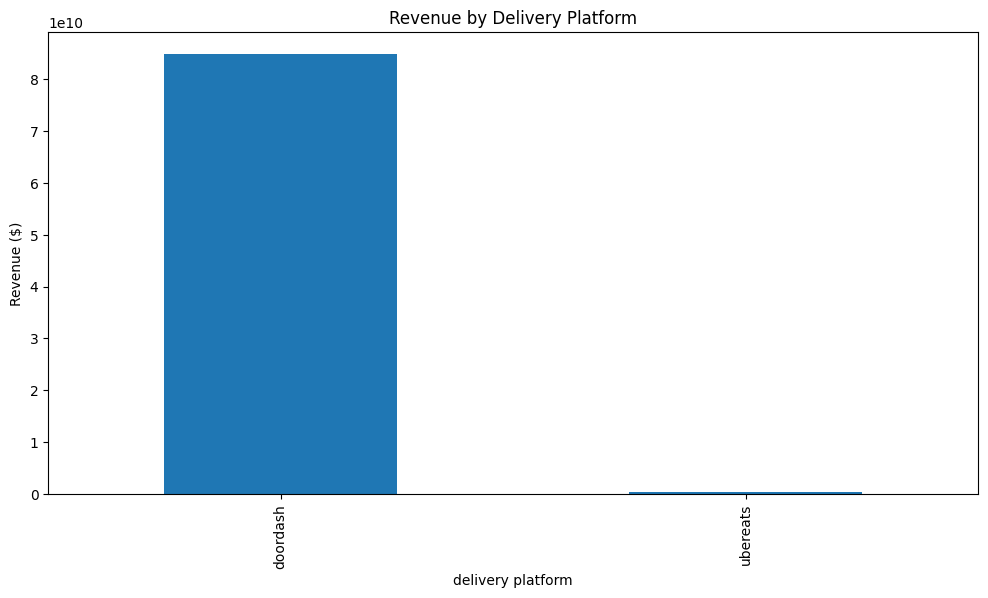

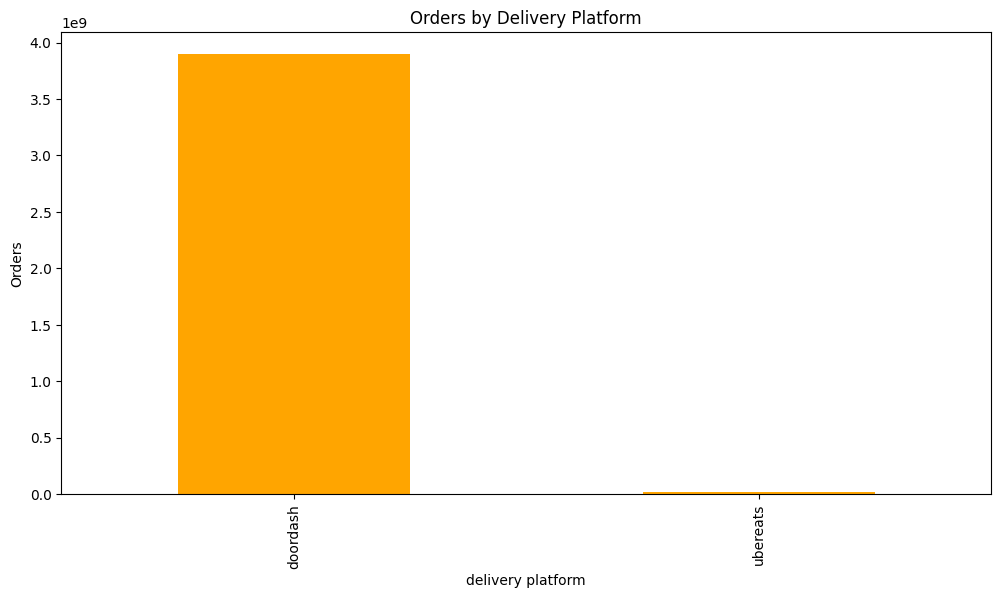

In [5]:
# Top insight 1: Revenue by platform


platform_revenue = cleaned_data.groupby('delivery platform')['platform_revenue'].sum().sort_values(ascending=False)
platform_orders = cleaned_data.groupby('delivery platform')['platform_orders'].sum().sort_values(ascending=False)

# Visualizing platform revenue and orders
plt.figure(figsize=(12, 6))
platform_revenue.plot(kind='bar', title='Revenue by Delivery Platform')
plt.ylabel('Revenue ($)')
plt.show()

plt.figure(figsize=(12, 6))
platform_orders.plot(kind='bar', title='Orders by Delivery Platform', color='orange')
plt.ylabel('Orders')
plt.show()



In [6]:
# Insight 2: Average order rating
average_rating = cleaned_data['order_rating'].mean()

# Insight 3: Order completion rate
completion_rate = (cleaned_data['order_completion'].mean()) * 100

# Returning key calculated insights
platform_revenue, platform_orders, average_rating, completion_rate

(delivery platform
 doordash    8.488138e+10
 ubereats    3.573859e+08
 Name: platform_revenue, dtype: float64,
 delivery platform
 doordash    3898503844
 ubereats      15256836
 Name: platform_orders, dtype: int64,
 np.float64(4.950967683588568),
 np.float64(0.0))

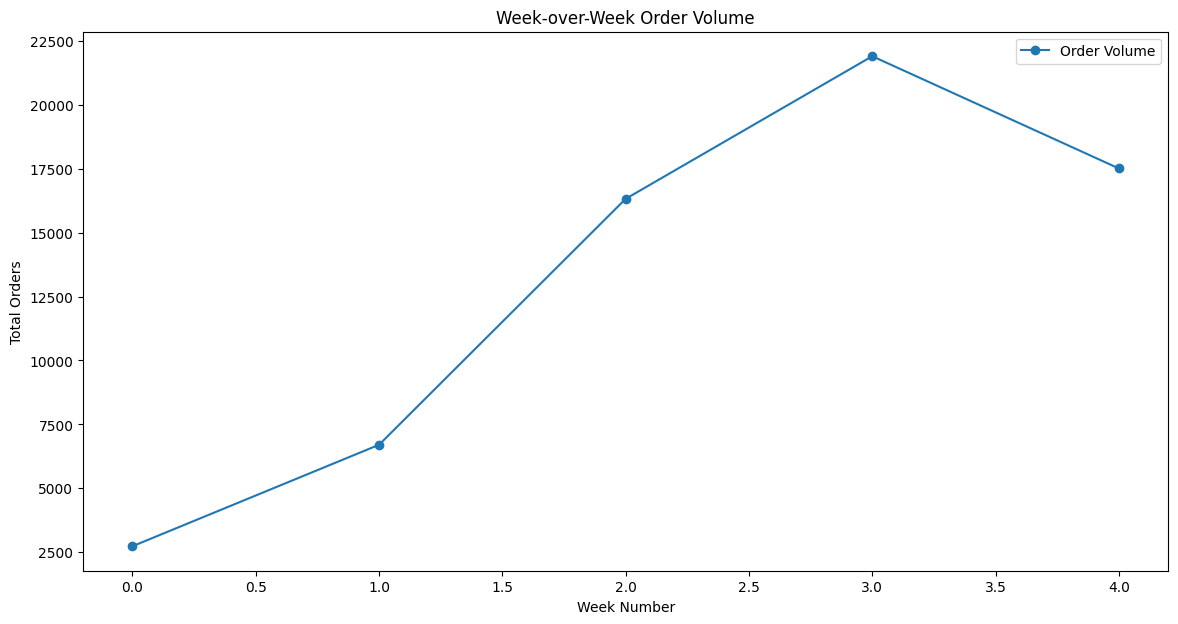

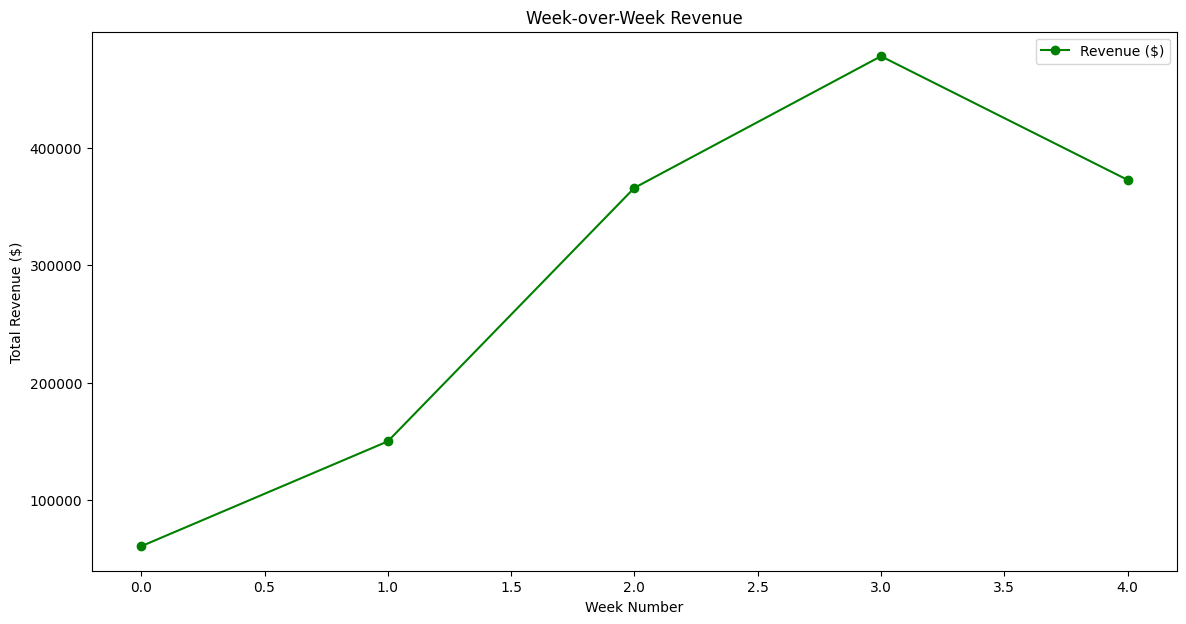

,year,week,total_orders,total_revenue
0,2023.0,9,2737,60925.45
1,2023.0,10,6704,150186.69
2,2023.0,11,16320,365941.42
3,2023.0,12,21897,477975.16
4,2023.0,13,17509,372712.97


In [7]:
cleaned_data['ordered_at'] = pd.to_datetime(cleaned_data['ordered_at'], errors='coerce')

# Extract week and year for grouping
cleaned_data['week'] = cleaned_data['ordered_at'].dt.isocalendar().week
cleaned_data['year'] = cleaned_data['ordered_at'].dt.year

# Group by year and week to calculate weekly metrics
weekly_metrics = cleaned_data.groupby(['year', 'week']).agg(
    total_orders=('order_id', 'count'),
    total_revenue=('subtotal', 'sum')
).reset_index()

# Visualize week-over-week order volume and revenue trends
plt.figure(figsize=(14, 7))
plt.plot(weekly_metrics['total_orders'], label='Order Volume', marker='o')
plt.title('Week-over-Week Order Volume')
plt.xlabel('Week Number')
plt.ylabel('Total Orders')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(weekly_metrics['total_revenue'], label='Revenue ($)', marker='o', color='green')
plt.title('Week-over-Week Revenue')
plt.xlabel('Week Number')
plt.ylabel('Total Revenue ($)')
plt.legend()
plt.show()

# Display weekly performance metrics
weekly_metrics.head()

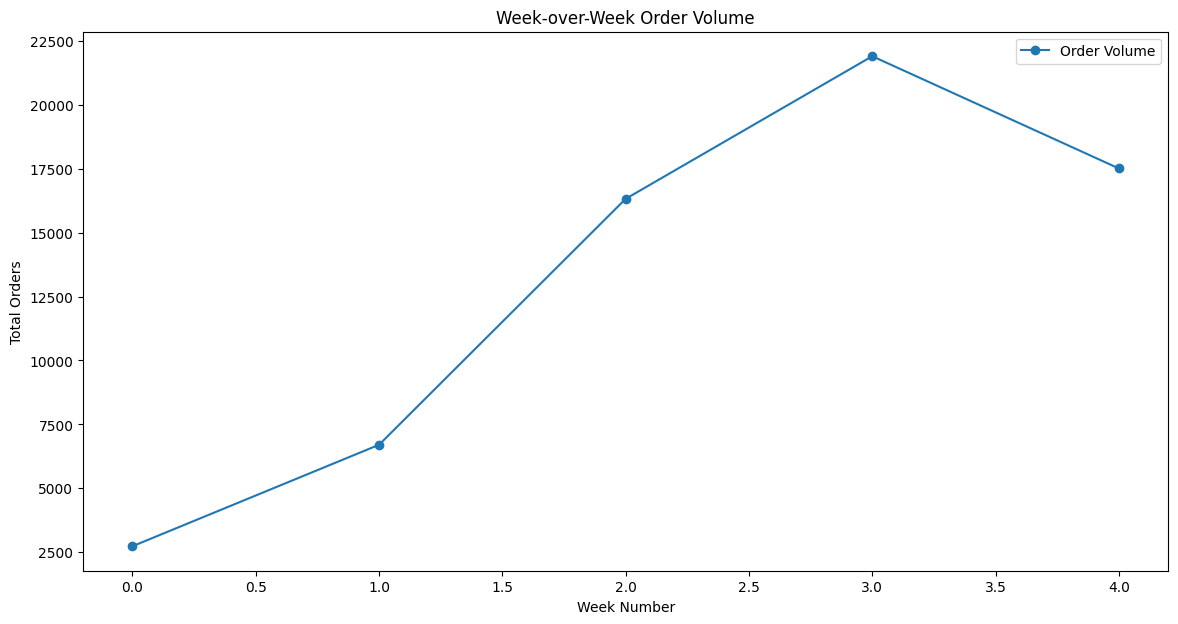

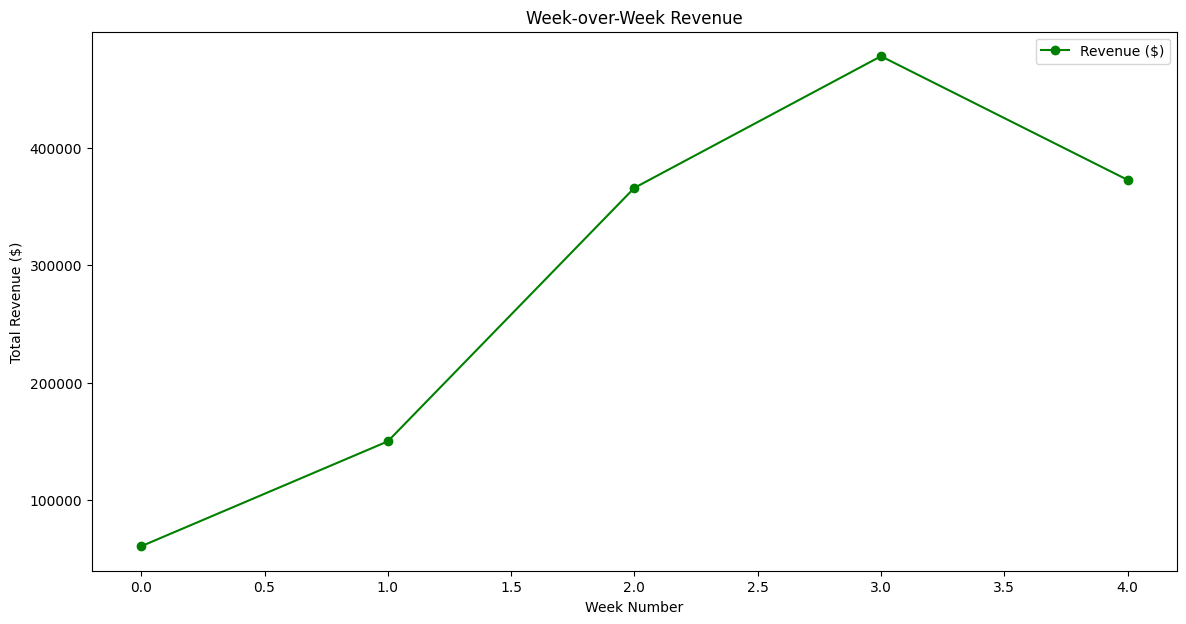

,year,week,total_orders,total_revenue
0,2023.0,9,2737,60925.45
1,2023.0,10,6704,150186.69
2,2023.0,11,16320,365941.42
3,2023.0,12,21897,477975.16
4,2023.0,13,17509,372712.97


In [12]:
# Convert 'ordered_at' to datetime for time-based analysis
cleaned_data['ordered_at'] = pd.to_datetime(cleaned_data['ordered_at'], errors='coerce')

# Extract week and year for grouping
cleaned_data['week'] = cleaned_data['ordered_at'].dt.isocalendar().week
cleaned_data['year'] = cleaned_data['ordered_at'].dt.year

# Group by year and week to calculate weekly metrics
weekly_metrics = cleaned_data.groupby(['year', 'week']).agg(
    total_orders=('order_id', 'count'),
    total_revenue=('subtotal', 'sum')
).reset_index()

# Visualize week-over-week order volume and revenue trends
plt.figure(figsize=(14, 7))
plt.plot(weekly_metrics['total_orders'], label='Order Volume', marker='o')
plt.title('Week-over-Week Order Volume')
plt.xlabel('Week Number')
plt.ylabel('Total Orders')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(weekly_metrics['total_revenue'], label='Revenue ($)', marker='o', color='green')
plt.title('Week-over-Week Revenue')
plt.xlabel('Week Number')
plt.ylabel('Total Revenue ($)')
plt.legend()
plt.show()

# Display weekly performance metrics
weekly_metrics.head()


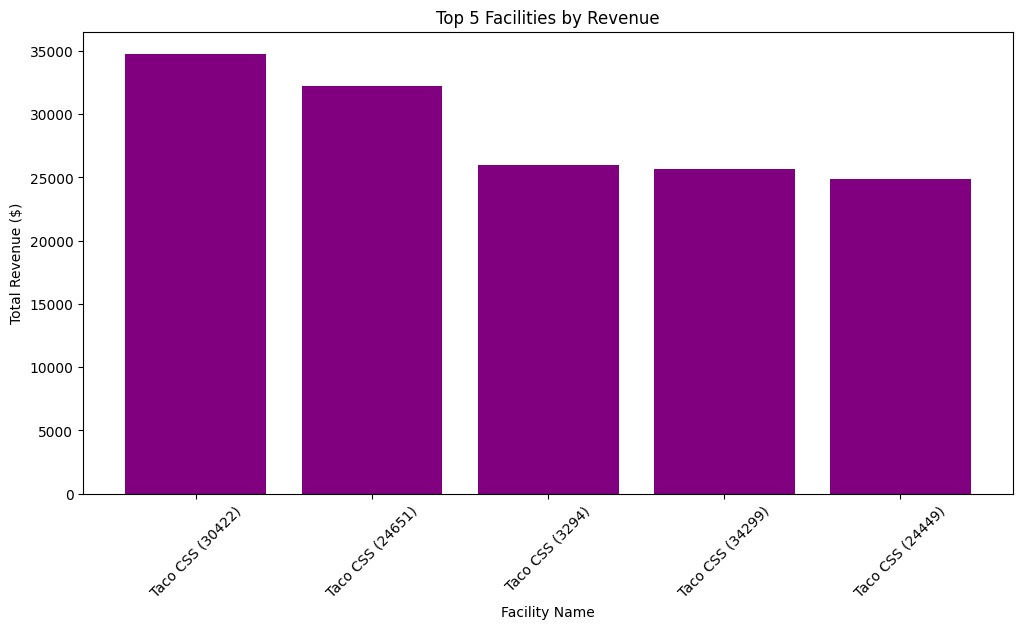

,facility_name,total_orders,total_revenue,avg_rating
0,Taco CSS (30422),1612,34788.77,4.929280
1,Taco CSS (24651),1402,32257.32,4.902282
2,Taco CSS (3294),1185,25945.20,4.899578
3,Taco CSS (34299),1278,25642.32,4.944444
4,Taco CSS (24449),1173,24878.97,4.898551


In [13]:
# Group by facility to analyze performance
location_performance = cleaned_data.groupby('facility_name').agg(
    total_orders=('order_id', 'count'),
    total_revenue=('subtotal', 'sum'),
    avg_rating=('order_rating', 'mean')
).sort_values(by='total_revenue', ascending=False).reset_index()

# Display top-performing locations
location_performance.head()

# Plot top 5 facilities by revenue
top_5_locations = location_performance.head(5)
plt.figure(figsize=(12, 6))
plt.bar(top_5_locations['facility_name'], top_5_locations['total_revenue'], color='purple')
plt.title('Top 5 Facilities by Revenue')
plt.xlabel('Facility Name')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()

location_performance.head()


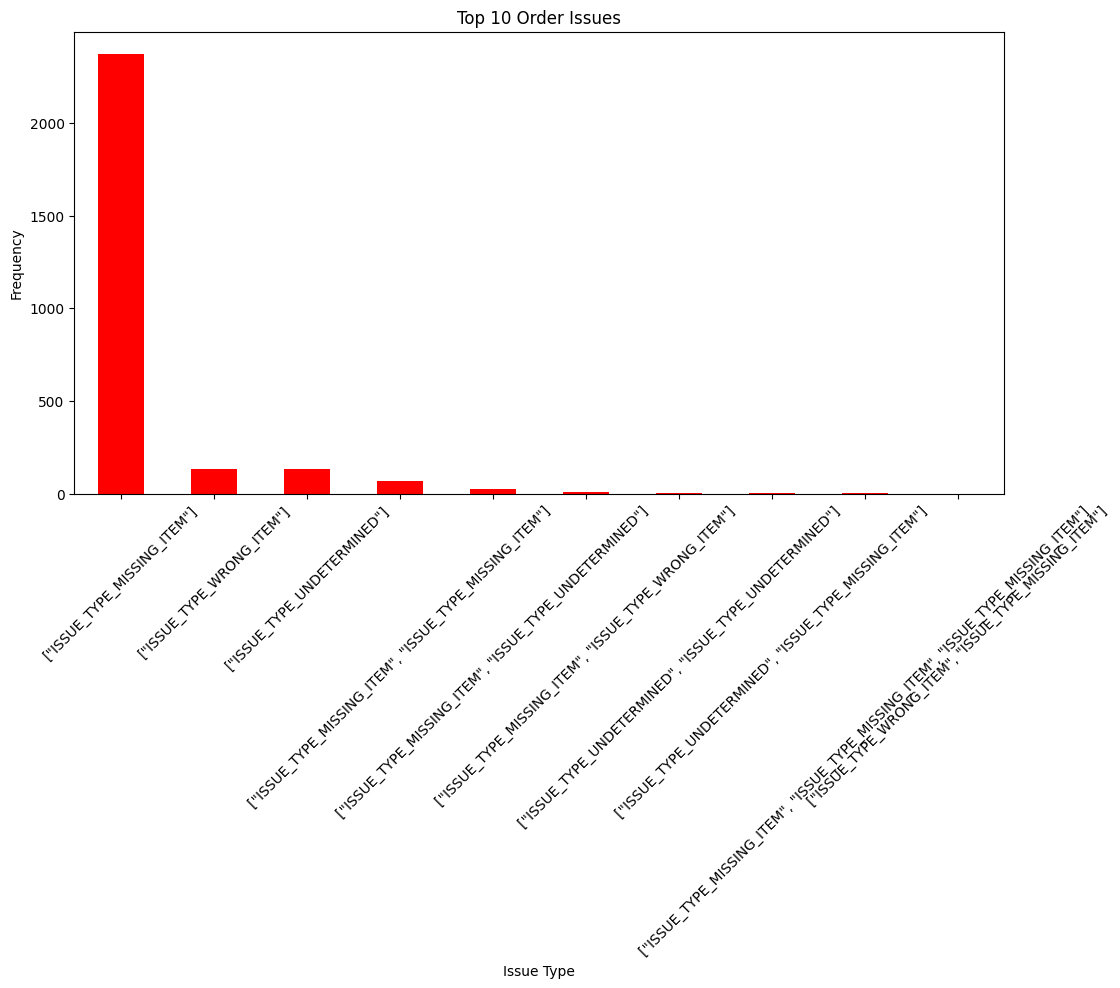

(order_issue_types
 ["ISSUE_TYPE_MISSING_ITEM"]                                                          2372
 ["ISSUE_TYPE_WRONG_ITEM"]                                                             135
 ["ISSUE_TYPE_UNDETERMINED"]                                                           132
 ["ISSUE_TYPE_MISSING_ITEM", "ISSUE_TYPE_MISSING_ITEM"]                                 71
 ["ISSUE_TYPE_MISSING_ITEM", "ISSUE_TYPE_UNDETERMINED"]                                 24
 ["ISSUE_TYPE_MISSING_ITEM", "ISSUE_TYPE_WRONG_ITEM"]                                    9
 ["ISSUE_TYPE_UNDETERMINED", "ISSUE_TYPE_UNDETERMINED"]                                  5
 ["ISSUE_TYPE_UNDETERMINED", "ISSUE_TYPE_MISSING_ITEM"]                                  5
 ["ISSUE_TYPE_MISSING_ITEM", "ISSUE_TYPE_MISSING_ITEM", "ISSUE_TYPE_MISSING_ITEM"]       3
 ["ISSUE_TYPE_WRONG_ITEM", "ISSUE_TYPE_MISSING_ITEM"]                                    1
 Name: count, dtype: int64,
 np.float64(4.16164234896901))

In [14]:
# Analyzing customer issues
issue_analysis = cleaned_data['order_issue_types'].value_counts().head(10)

# Visualize common issues
plt.figure(figsize=(12, 6))
issue_analysis.plot(kind='bar', color='red')
plt.title('Top 10 Order Issues')
plt.xlabel('Issue Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Percentage of orders with issues
issues_percentage = (cleaned_data['has_issues'].sum() / len(cleaned_data)) * 100

issue_analysis, issues_percentage


In [15]:
# Recommendations based on insights

# 1. Identify facilities with the highest issue rates
issues_by_facility = cleaned_data.groupby('facility_name').agg(
    total_orders=('order_id', 'count'),
    issue_count=('has_issues', 'sum'),
    issue_rate=('has_issues', 'mean')  # Average issue rate per facility
).sort_values(by='issue_rate', ascending=False).reset_index()

# 2. Identify platform-specific issues
issues_by_platform = cleaned_data.groupby('delivery platform').agg(
    total_orders=('order_id', 'count'),
    issue_count=('has_issues', 'sum'),
    issue_rate=('has_issues', 'mean')  # Average issue rate per platform
).sort_values(by='issue_rate', ascending=False).reset_index()

# Display key insights for recommendations
issues_by_facility.head(), issues_by_platform.head()


(      facility_name  total_orders  issue_count  issue_rate
 0  Taco CSS (32031)           154           14    0.090909
 1  Taco CSS (24651)          1402          127    0.090585
 2  Taco CSS (30407)           573           49    0.085515
 3  Taco CSS (27361)           434           36    0.082949
 4  Taco CSS (26742)           332           27    0.081325,
   delivery platform  total_orders  issue_count  issue_rate
 0          doordash         62438         2761     0.04422
 1          ubereats          3906            0     0.00000)

In [25]:
# Calculate cancellation rates based on 'cancelled_at'
cleaned_data['is_cancelled'] = cleaned_data['cancelled_at'].notnull().astype(int)


cleaned_data['accepted_at'] = pd.to_datetime(cleaned_data['accepted_at'], errors='coerce')
cleaned_data['courier_arrived_at'] = pd.to_datetime(cleaned_data['courier_arrived_at'], errors='coerce')
cleaned_data['accept_to_delivery_start'] = (cleaned_data['courier_arrived_at'] - cleaned_data['accepted_at']).dt.total_seconds()

# Group by facility to analyze delivery delays and cancellations
facility_delivery_analysis = cleaned_data.groupby('facility_name').agg(
    accepted=('accepted_at', 'mean'),
    delivered=('courier_arrived_at', 'mean'),
    avg_delivery_time=('accept_to_delivery_start', 'mean'),
    total_orders=('order_id', 'count'),
    cancellations=('is_cancelled', 'sum'),
    cancel_rate=('is_cancelled', 'mean')
).reset_index()

# Filter for facilities with the highest cancellation rates
facility_delivery_analysis['cancel_rate'] = facility_delivery_analysis['cancel_rate'] * 100  # Convert to percentage
facility_delivery_analysis = facility_delivery_analysis.sort_values(by='cancel_rate', ascending=False)

# Display facilities with high cancellation rates and their average delivery times
facility_delivery_analysis.head()

,facility_name,accepted,delivered,avg_delivery_time,total_orders,cancellations,cancel_rate
97,Taco CSS (30409),1970-01-01 00:27:59.302069583,1970-01-01 00:27:59.304787438,0.000234,967,100,10.341262
48,Taco CSS (26084),1970-01-01 00:27:59.369012319,1970-01-01 00:27:59.375013808,0.000193,656,52,7.926829
73,Taco CSS (27361),1970-01-01 00:27:59.433627347,1970-01-01 00:27:59.438193435,0.000208,434,30,6.912442
40,Taco CSS (24449),1970-01-01 00:27:59.342709223,1970-01-01 00:27:59.334986384,0.000200,1173,73,6.223359
15,Taco CSS (1880),1970-01-01 00:27:59.434981451,1970-01-01 00:27:59.438778065,0.000234,1018,63,6.188605
